In [1]:
from bunkatech.nested_topic_modeling import nested_topic_modeling
from bunkatech.networks.centroids import find_centroids
import pandas as pd
import bamboolib
import plotly
import pickle
from sklearn.datasets import fetch_20newsgroups

docs = fetch_20newsgroups(subset="all", remove=("headers", "footers", "quotes"))["data"]
df = pd.DataFrame(docs)
df = df.sample(2000)
df = df.reset_index(drop=True)
df.columns = ["text"]
df["bindex"] = df.index

#### Fit the model

In [2]:
model = nested_topic_modeling()

bunka = model.fit(
    df,
    text_var="text",
    index_var="bindex",
    sample_size=2000,
    sample_terms=2000,
    embeddings_model="tfidf",
    ngrams=(2, 3),
    ents=False,
    language="en",
    db_path=".",
)

Embeddings..
Reducing the vectors..
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, n_neighbors=10, verbose=True)
Thu Feb 24 16:54:25 2022 Construct fuzzy simplicial set
Thu Feb 24 16:54:26 2022 Finding Nearest Neighbors
Thu Feb 24 16:54:28 2022 Finished Nearest Neighbor Search
Thu Feb 24 16:54:31 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Feb 24 16:54:36 2022 Finished embedding
Extract Terms...


100%|███████████████████████████████████████████████████████████████████| 1957/1957 [01:54<00:00, 17.05it/s]


#### Visualize embeddings for a given nested level

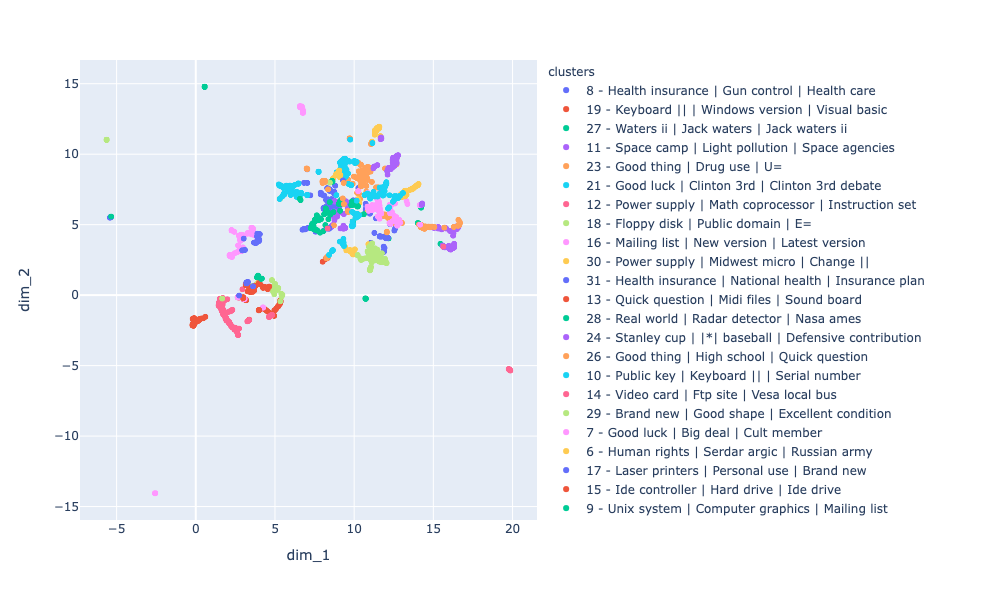

In [6]:
fig = model.visualize_embeddings(nested_level = 1 , width = 1000, height = 600)
fig.show()
#plotly.offline.plot(fig, auto_open=True, filename="saved_graph/embeddings.html")

#### Get the centroids elements

In [4]:
df_centroid = model.get_centroid_documents(nested_level= 0, top_elements = 1)

df_centroid[df_centroid['clusters']==0]['centroid_docs'].values

array(["    >>>Does the greatly increased rates of incarceration amongst\n    >>>blacks show that they are dysfunctional or that the majority\n    >>>of them support criminal activity?\n    >>>\n    >Isn't this a matter of demographics? Doesn't this simply show\n    >that since criminal behaviour is common (or apt to be common)\n    >in the 18-34 (insert your favorite correct numbers here) year\n    >old range and since the percentage of blacks in this range is\n    >higher than in other groups, then it follows statistically\n    >that more blacks in prison is an expected result?\n    >\n    >Note that I haven't said anything about blacks being given\n    >stiffer or longer sentences than other groups. I'm sure this\n    >has to have an effect on the issue of over-representation of\n    >blacks in prison...\n\nBlacks have the same (+- 2%) crime report rate, arrest rate, and incarceration\nrate for violent crimes.\n\nSo I doubt that for violent crimes, that there is any inherent bias me

#### Access the Bunka Visualization

In [7]:
plotly.offline.plot(bunka.sankey, auto_open=True, filename="sankey.html")
plotly.offline.plot(bunka.treemap, auto_open=True, filename="treemap.html")
plotly.offline.plot(
    bunka.sunburst, auto_open=True, filename="sunburst.html"
)

'sunburst.html'

#### Get informations computed by the moded

In [8]:
terms = bunka.terms
df_cluster_names = bunka.h_clusters_names
df = bunka.df
df_embeddings = bunka.embeddings
df_indexed = bunka.indexed_terms
df_cluster_number = bunka.h_clusters_number